In [55]:
import pandas as pd
import matplotlib.pyplot as plt

In [56]:

df_ubereats_centro = pd.read_csv(r'csv/ubereats-pizza-centro.csv')
df_ubereats_alamos = pd.read_csv(r'csv/ubereats-pizza-alamos.csv')
df_ubereats_juriquilla = pd.read_csv(r'csv/ubereats-pizza-juriquilla.csv')
df_ubereats_milenio = pd.read_csv(r'csv/ubereats-pizza-milenio.csv')
df_ubereats_refugio = pd.read_csv(r'csv/ubereats-pizza-refugio.csv')

df_ubereats_balvanera = pd.read_csv(r'csv/ubereats-pizza-balvanera.csv')
df_ubereats_campanario = pd.read_csv(r'csv/ubereats-pizza-campanario.csv')
df_ubereats_cerritocolorado = pd.read_csv(r'csv/ubereats-pizza-cerritocolorado.csv')
df_ubereats_cimatario = pd.read_csv(r'csv/ubereats-pizza-cimatario.csv')
df_ubereats_el_pueblito = pd.read_csv(r'csv/ubereats-pizza-el-pueblito.csv')

df_rappi_centro = pd.read_csv(r'csv/rappi-pizza-centro.csv')
df_rappi_alamos = pd.read_csv(r'csv/rappi-pizza-alamos.csv')
df_rappi_juriquilla = pd.read_csv(r'csv/rappi-pizza-juriquilla.csv')
df_rappi_milenio = pd.read_csv(r'csv/rappi-pizza-milenio.csv')
df_rappi_refugio = pd.read_csv(r'csv/rappi-pizza-refugio.csv')

df_rappi_balvanera = pd.read_csv(r'csv/rappi-pizza-balvanera.csv')
df_rappi_campanario = pd.read_csv(r'csv/rappi-pizza-campanario.csv')
df_rappi_cerritocolorado = pd.read_csv(r'csv/rappi-pizza-cerritocolorado.csv')
df_rappi_cimatario = pd.read_csv(r'csv/rappi-pizza-cimatario.csv')
df_rappi_el_pueblito = pd.read_csv(r'csv/rappi-pizza-el-pueblito.csv')

frames = [
    df_ubereats_centro, 
    df_ubereats_alamos, 
    df_ubereats_juriquilla, 
    df_ubereats_milenio, 
    df_ubereats_refugio, 
    df_ubereats_balvanera, 
    df_ubereats_campanario, 
    df_ubereats_cerritocolorado, 
    df_ubereats_cimatario, 
    df_ubereats_el_pueblito, 
    df_rappi_centro, 
    df_rappi_alamos, 
    df_rappi_juriquilla, 
    df_rappi_milenio, 
    df_rappi_refugio, 
    df_rappi_balvanera, 
    df_rappi_campanario, 
    df_rappi_cerritocolorado, 
    df_rappi_cimatario, 
    df_rappi_el_pueblito]

df = pd.concat(frames, ignore_index=True)

In [57]:
print('Elementos en el df: {} '.format(df.count()['name']))

Elementos en el df: 38876 


In [58]:
# Se remueven los parentecis de evals 
df['evals'] = df['evals'].apply(lambda x: float(x[1:len(x)-1]) if not isinstance(x, float) else x)

In [59]:
totalEvals = df['evals'].sum()
print('El total de Evaluaciones fue {}'.format(totalEvals))

El total de Evaluaciones fue 1906288.0


In [60]:
# Operaciones para Determinar la mejor Pizzeria
# df['factor'] = df['evals'] / totalEvals
# df['stars'] = df['factor'] * df['rating']

df['factor'] = df['evals'] / totalEvals
df['stars'] = df['factor'] * df['rating']
df.loc[:,['name','rating','evals','factor','stars']]

,name,rating,evals,factor,stars
0,Di Vino,4.5,64.0,0.000034,0.000151
1,Diktatur (Guerrero),4.9,10.0,0.000005,0.000026
2,The Zone Bread and Coffee,4.8,26.0,0.000014,0.000065
3,Papa John's Pizza Jardines,4.7,161.0,0.000084,0.000397
4,Micaela Cocina & Café,4.8,79.0,0.000041,0.000199
...,...,...,...,...,...
38907,Trapani Pizza,4.8,NaN,NaN,NaN
38908,Il Pizzaiolo Qro,4.2,NaN,NaN,NaN
38909,Pizza Riko,NaN,NaN,NaN,NaN
38910,Estacion 19,NaN,NaN,NaN,NaN


In [61]:
# Se ordena por stars, para validar el resultado
Eval = df.loc[:,['name','rating','evals','factor','stars']].sort_values(by=['stars'], ascending=False)
df.loc[:,['name','rating','evals','factor','stars']].sort_values(by=['stars'], ascending=False)


,name,rating,evals,factor,stars
8427,Little Caesars (Corregidora),4.8,500.0,0.000262,0.001259
5028,Little Caesars (Corregidora),4.8,500.0,0.000262,0.001259
5311,Little Caesars (Corregidora),4.8,500.0,0.000262,0.001259
7971,Little Caesars (Corregidora),4.8,500.0,0.000262,0.001259
5177,Little Caesars (Corregidora),4.8,500.0,0.000262,0.001259
...,...,...,...,...,...
38907,Trapani Pizza,4.8,NaN,NaN,NaN
38908,Il Pizzaiolo Qro,4.2,NaN,NaN,NaN
38909,Pizza Riko,NaN,NaN,NaN,NaN
38910,Estacion 19,NaN,NaN,NaN,NaN


In [62]:
EvalR = Eval.drop_duplicates()
print(EvalR)

                               name  rating  evals    factor     stars
8427   Little Caesars (Corregidora)     4.8  500.0  0.000262  0.001259
30375   El Globo Citadina Querétaro     4.8  497.0  0.000261  0.001251
4020    El Globo Queretaro Jardines     4.8  484.0  0.000254  0.001219
25372                   Boyos Pizza     4.8  465.0  0.000244  0.001171
29601                 Trapani Pizza     4.8  388.0  0.000204  0.000977
...                             ...     ...    ...       ...       ...
38196                     Piu Pizza     4.8    NaN       NaN       NaN
38254                     Pizza Pop     NaN    NaN       NaN       NaN
38259          Mariscos El Naufrago     NaN    NaN       NaN       NaN
38260               Pandini's Pizza     NaN    NaN       NaN       NaN
38327                 La Piazza Qro     NaN    NaN       NaN       NaN

[489 rows x 5 columns]


In [63]:
print('--- Top 10 Restaurantes que venden Pizza en Qro ---\n')
top10 = EvalR.iloc[0:10]
print(top10)

--- Top 10 Restaurantes que venden Pizza en Qro ---

                               name  rating  evals    factor     stars
8427   Little Caesars (Corregidora)     4.8  500.0  0.000262  0.001259
30375   El Globo Citadina Querétaro     4.8  497.0  0.000261  0.001251
4020    El Globo Queretaro Jardines     4.8  484.0  0.000254  0.001219
25372                   Boyos Pizza     4.8  465.0  0.000244  0.001171
29601                 Trapani Pizza     4.8  388.0  0.000204  0.000977
30025          Boyos Pizza Candiles     4.7  391.0  0.000205  0.000964
9196          Pizza Hut Corregidora     4.5  402.0  0.000211  0.000949
28099                    Don Carbón     4.5  326.0  0.000171  0.000770
9493             Sushi Roll (Antea)     4.5  304.0  0.000159  0.000718
27019                  Il Pizzaiolo     4.3  287.0  0.000151  0.000647


Text(0.5, 0, 'Stars')

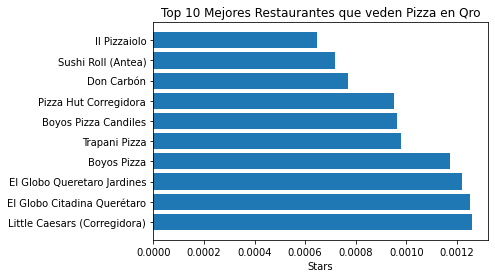

In [49]:
plt.barh(top10['name'],top10['stars'])
plt.title("Top 10 Mejores Restaurantes que veden Pizza en Qro")
plt.xlabel("Stars")